In [1]:
import pandas as pd
from pandas import *
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import ta 
from ta.momentum import *
from ta.trend import *
#plt.style.use("fivethirtyeight")

In [2]:
def decide_one_day(data):
    rsi = data["RSI"].values[0]
    if rsi <= 30:
        rsi = True
    elif rsi >= 70:
        rsi = False
    wr = data["WR"].values[0]
    if wr <= -80:
        wr = True
    elif wr >= -20:
        wr = False
   
    macd_buy = data["macd_buy"].values
    macd_sell = data["macd_sell"].values
    if macd_buy == 1 or isinstance(macd_buy,np.float):
        macd_buy = True
    else: 
        macd_buy = False
    if macd_sell == 1 or isinstance(macd_sell,np.float):
        macd_sell = True 
    else: 
        macd_sell = False
    if macd_buy == True:
        macd = True
    elif macd_sell == True:
        macd = False
    sma_buy = data["Buy"].values
    sma_sell = data["Sell"].values
    if sma_buy == 1 or isinstance(sma_buy,np.float):
        sma_buy = True
    else: 
        sma_buy = False
    if sma_sell == 1 or isinstance(sma_sell,np.float):
        sma_sell = True 
    else: 
        sma_sell = False
    if sma_buy == True:
        sma = True
    elif sma_sell == True:
        sma = False    
    decision = [rsi, wr, macd, sma]
    print(decision)
    yes = [ 1 for x in decision if x == True]
    print(yes)
    no = [ 1 for x in decision if x == False]
    print(no)
    if len(yes) > (len(decision)/2):
        return True
    if len(no) > (len(decision)/2):
        return False
    #return decision

In [210]:
def check_for_signal(row):
    adx_value = row["ADX"].values[0]
    adx_pos = row["ADX_POS"].values[0]
    adx_neg = row["ADX_NEG"].values[0]
    if adx_pos > adx_neg and adx_value > 25:
        adx = True
    elif adx_neg > adx_pos and adx_value > 25:
        adx = False
    else:
        adx = "undecided"    
    rsi = row["RSI"].values[0]
    if rsi <= 30:
        rsi = True
    elif rsi >= 70:
        rsi = False
    else:
        rsi = "undecided"
    wr = row["WR"].values[0]
    if wr <= -80:
        wr = True
    elif wr >= -20:
        wr = False
    else:
        wr = "undecided"
    macd_buy = row["macd_buy"].values
    macd_sell = row["macd_sell"].values
    if np.isnan(macd_buy) == False:
        macd_buy = True
    else: 
        macd_buy = False
    if np.isnan(macd_sell) == False:
        macd_sell = True 
    else: 
        macd_sell = False
    if macd_buy == True:
        macd = True
    elif macd_sell == True:
        macd = False
    else:
        macd = "undecided"
    
    sma_buy = row["Buy"].values
    sma_sell = row["Sell"].values
    
    if np.isnan(sma_buy) == False:
        sma_buy = True
    else: 
        sma_buy = False
    if np.isnan(sma_sell) == False:
        sma_sell = True 
    else: 
        sma_sell = False
    if sma_buy == True:
        sma = True
    elif sma_sell == True:
        sma = False    
    else:
        sma = "undecided"   
    
    sma_30_value = row["SMA_30"].values[0]
    sma_100_value = row["SMA_100"].values[0]
    close_value = row["Close"].values[0]

    if close_value > sma_30_value and close_value > sma_100_value:
        sma_above = True
    else: 
        sma_above = False
        
    decision = []
    decision_buy = [sma, sma_above, macd, adx]
    decision_sell = [wr]
    
    buy_yes = [ 1 for x in decision_buy if x == True]
    buy_undecided = [1 for x in decision_buy if x == "undecided"]
    buy_no = [ 1 for x in decision_buy if x == False]
    
    sell_yes = [ 1 for x in decision_sell if x == False]
    sell_undecided = [1 for x in decision_sell if x == "undecided"]
    sell_no = [ 1 for x in decision_sell if x == True]
    
    
    if len(buy_yes) > (len(decision_buy)/2):
        return True
    elif len(sell_yes) > (len(decision_sell)/2):
        return False
    else:
        return "undecided"    

In [4]:
def plot_decision(data):
    decision_buy = []
    decision_sell = []
    decision_undecided= []

    for record in range(len(data)):
        decision_for_today = check_for_signal(data[record:(record+1)])
        if decision_for_today == True:
            decision_buy.append(data["Close"][record:record+1].values[0])
            decision_sell.append(np.nan)
            decision_undecided.append(np.nan)
        if decision_for_today == False:
            decision_buy.append(np.nan)
            decision_sell.append(data["Close"][record:record+1].values[0])
            decision_undecided.append(np.nan)
        if decision_for_today == "undecided":
            decision_buy.append(np.nan)
            decision_sell.append(np.nan)
            decision_undecided.append(data["Close"][record:record+1].values[0])        
    data["Decision_Buy"] = decision_buy
    data["Decision_Sell"] = decision_sell
    #print(data.Decision)
    plt.figure(figsize=(16,8))
    plt.title("All Indicators decision")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.plot(data["Close"], color="blue", label="price")
    plt.plot(data.index, data["Decision_Buy"], color="green", marker="^", label="buy")
    plt.plot(data.index, data["Decision_Sell"], color="red", marker="v", label="sell")
    plt.legend()

In [94]:
def buy_sell_sma(data):
    flag = -1
    sigPriceBuy = []
    sigPriceSell = []    
    for record in range(len(data)):
        if data["SMA_30"][record] > data["SMA_100"][record]:
            if flag != 0:
                sigPriceBuy.append(data["Close"][record])
                sigPriceSell.append(np.nan)
                flag = 0
            else:
                sigPriceBuy.append(data["Close"][record])
                sigPriceSell.append(np.nan)
        elif data["SMA_30"][record] < data["SMA_100"][record]:   
            if flag != 1:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data["Close"][record])
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data["Close"][record])
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return(sigPriceBuy,sigPriceSell)

In [95]:
def buy_sell_macd(data):
    flag = -1
    sigPriceBuy = []
    sigPriceSell = []    
    for record in range(len(data)):
        if data["macd"][record] > data["macd_signal"][record]:
            if flag != 0:
                sigPriceBuy.append(data["Close"][record])
                sigPriceSell.append(np.nan)
                flag = 0
            else:
                sigPriceBuy.append(data["Close"][record])
                sigPriceSell.append(np.nan)
        elif data["macd"][record] < data["macd_signal"][record]:   
            if flag != 1:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data["Close"][record])
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data["Close"][record])
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return(sigPriceBuy,sigPriceSell)

In [211]:
def decide(indikator):
    df = web.DataReader(indikator, data_source="yahoo", start="2019-06-12", end="2020-05-27")
    close = df.filter(["Close"])
    dataset = df.filter(["Close"])
    days = df.filter(["Date"])
    plt.figure(figsize=(16,8))
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title("DAX Price over 30 years")
    plt.plot(close)
    
    
    dataset['SMA_30'] = close.iloc[:,:].rolling(window=20).mean()
    dataset['SMA_100'] = close.iloc[:,:].rolling(window=30).mean()
    #MACD
    exp1 = close.Close.ewm(span=12, adjust=False).mean()
    exp2 = close.Close.ewm(span=26, adjust=False).mean()

    macd = exp1 - exp2
    signal_line = macd.ewm(span=9, adjust=False).mean()
    #WilliamsR
    #close[-5:]
    dataset["macd"] = macd
    dataset["macd_signal"] =signal_line
    #x = close
    #x["Test"] = ta.momentum.RSIIndicator(close.Close, 10, True)
    #x
    dataset
    
    
    
    plt.figure(figsize=(16,8))
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title("SMA indicator")
    #plt.plot(dataset)
    plt.plot(close, label="price")
    plt.plot(dataset["SMA_30"], label="SMA_30")
    plt.plot(dataset["SMA_100"], label="SMA_100")
    #plt.plot(dataset["macd"], label='MACD')
    #plt.plot(dataset["macd_signal"], label='Signal Line')
    plt.legend()
    
    
    plt.figure(figsize=(16,8))
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title("MACD Priceline")
    #plt.plot(dataset)
    #plt.plot(close, label="price")
    plt.plot(dataset["macd"], label='MACD')
    plt.plot(dataset["macd_signal"], label='Signal Line')
    plt.legend()
    
        
    buy_sell = buy_sell_macd(dataset)
    dataset["macd_buy"]=buy_sell[0]
    dataset["macd_sell"]=buy_sell[1]
    
    
    plt.figure(figsize=(16,8))
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title("DAX MACD Buy Sell")
    plt.plot(close, label="price")
    plt.plot(dataset.index, dataset["macd_buy"], label="Buy", marker="^", color="green")
    plt.plot(dataset.index, dataset["macd_sell"], label="Sell", marker="v", color="red")
    plt.legend()
    
    
    buy_sell = buy_sell_sma(dataset)
    dataset["Buy"]= buy_sell[0]
    dataset["Sell"] = buy_sell[1]

    plt.figure(figsize=(16,8))
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title("DAX SMA30/100 Buy sell")
    plt.plot(close, label="price")
    plt.plot(dataset.index, dataset["Buy"], label="Buy", marker="^", color="green")
    plt.plot(dataset.index, dataset["Sell"], label="Sell", marker="v", color="red")
    plt.legend()
    

    
    RSI = RSIIndicator(dataset["Close"], 28)
    dataset["RSI"] = RSI.rsi()
    
    
    plt.figure(figsize=(16,8))
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title("RSI")
    #plt.plot(close, label="price")
    plt.plot(dataset["RSI"], label="RSI")
    plt.legend()
    
    WR = WilliamsRIndicator(df["High"], df["Low"], df["Close"], 28)
    dataset["WR"] = WR.wr()
    
    plt.figure(figsize=(16,8))
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title("Williams R")
    #plt.plot(close, label="price")
    plt.plot(dataset["WR"], label="WR")
    plt.legend()
    
    adx_values = adx(df["High"], df["Low"], df["Close"],10)
    dataset["ADX"] = adx_values
    
    adx_pos_val = adx_pos(df["High"], df["Low"], df["Close"],10)
    dataset["ADX_POS"] = adx_pos_val

    adx_neg_val = adx_neg(df["High"], df["Low"], df["Close"],10)
    dataset["ADX_NEG"] = adx_neg_val
    adx_buy = []
    adx_sell = []
    flag = 0
    for x in range(len(dataset)):
        if dataset["ADX_POS"][x:x+1].values[0] > dataset["ADX_NEG"][x:x+1].values[0] and dataset["ADX"][x:x+1].values[0] > 25:
            if flag != 1:
                adx_buy.append(dataset["Close"][x:x+1])
                adx_sell.append(np.nan)
                flag =1
            elif flag == 1:
                adx_buy.append(dataset["Close"][x:x+1])
                adx_sell.append(np.nan)
        elif dataset["ADX_NEG"][x:x+1].values[0] > dataset["ADX_POS"][x:x+1].values[0] and dataset["ADX"][x:x+1].values[0] > 25:
            if flag != -1:
                adx_sell.append(dataset["Close"][x:x+1])
                adx_buy.append(np.nan)   
                flag = -1
            elif flag == -1:
                adx_buy.append(np.nan)
                adx_sell.append(dataset["Close"][x:x+1])  
        else:
            adx_buy.append(np.nan)       
            adx_sell.append(np.nan)   
            flag = 0  
    dataset["ADX_SIGNAL_BUY"] = adx_buy
    dataset["ADX_SIGNAL_SELL"] = adx_sell
    
    plt.figure(figsize=(16,8))
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title("ADX")
    #plt.plot(close, label="price")
    plt.plot(dataset["ADX"], label="ADX")
    plt.plot(dataset["ADX_POS"], label="ADX_POS", color="green")
    plt.plot(dataset["ADX_NEG"], label="ADX_NEG", color="red")
    plt.legend()
    
    plt.figure(figsize=(16,8))
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title("ADX")
    #plt.plot(close, label="price")
    plt.plot(dataset["Close"], label="ADX")
    plt.plot(dataset["ADX_SIGNAL_BUY"], label="ADX_POS", marker="^", color="green")
    plt.plot(dataset["ADX_SIGNAL_SELL"], label="ADX_NEG", marker="v", color="red")
    plt.legend()
    
    return dataset


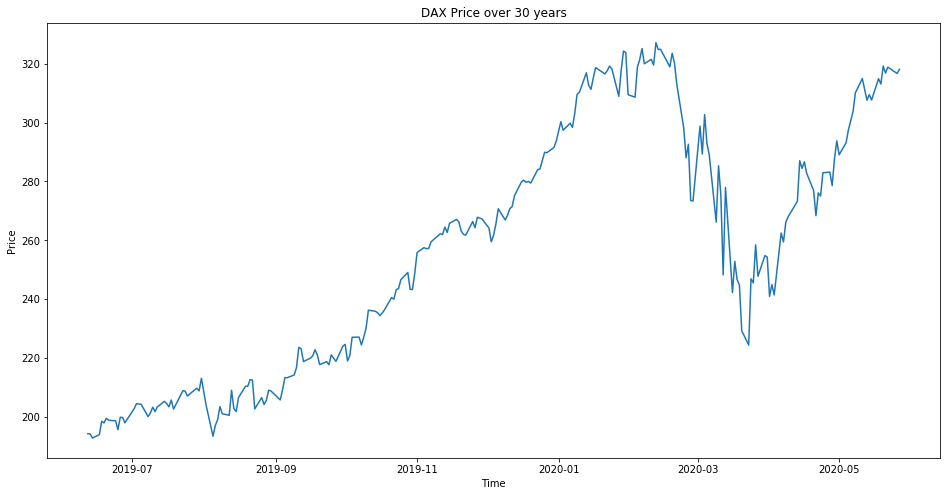

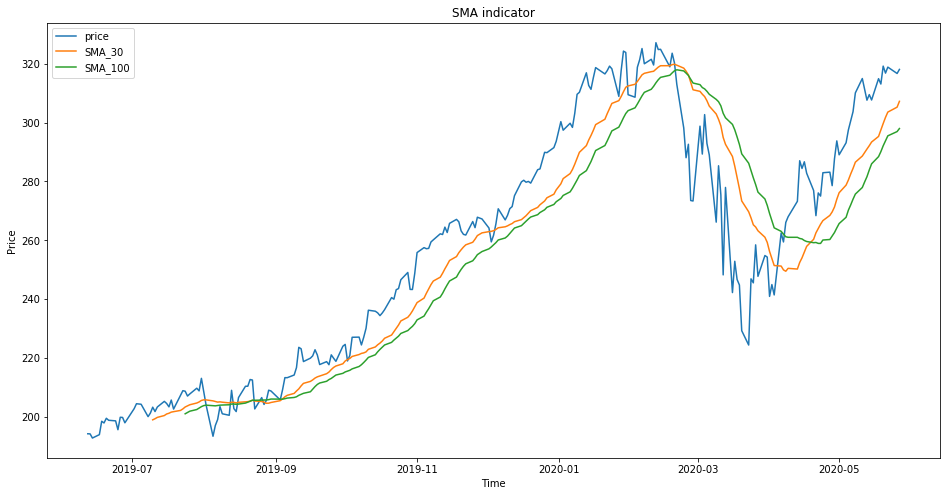

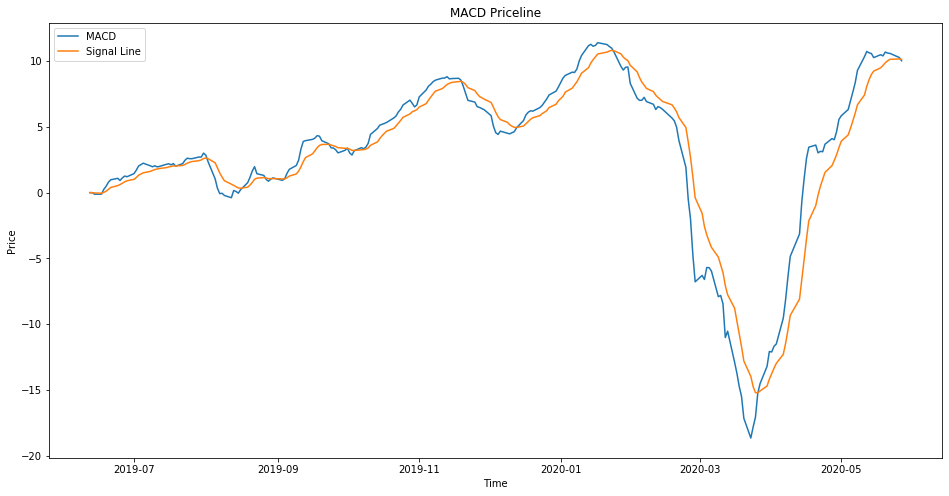

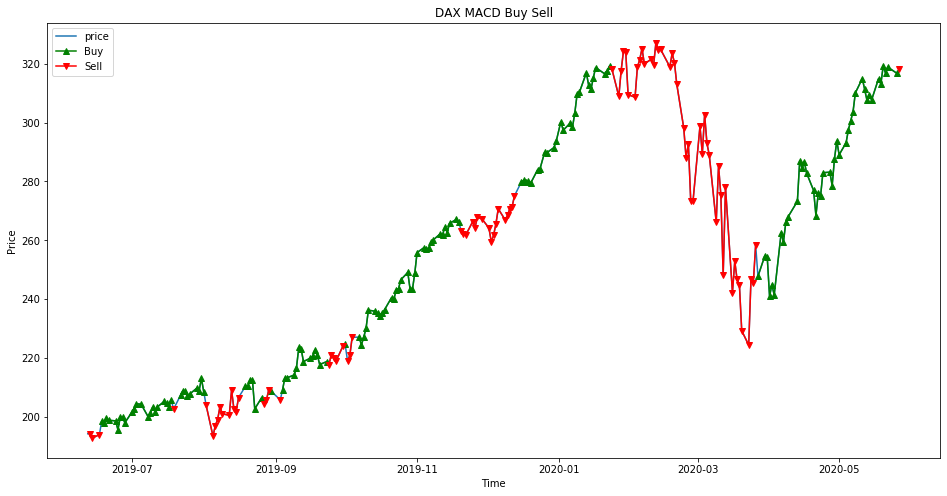

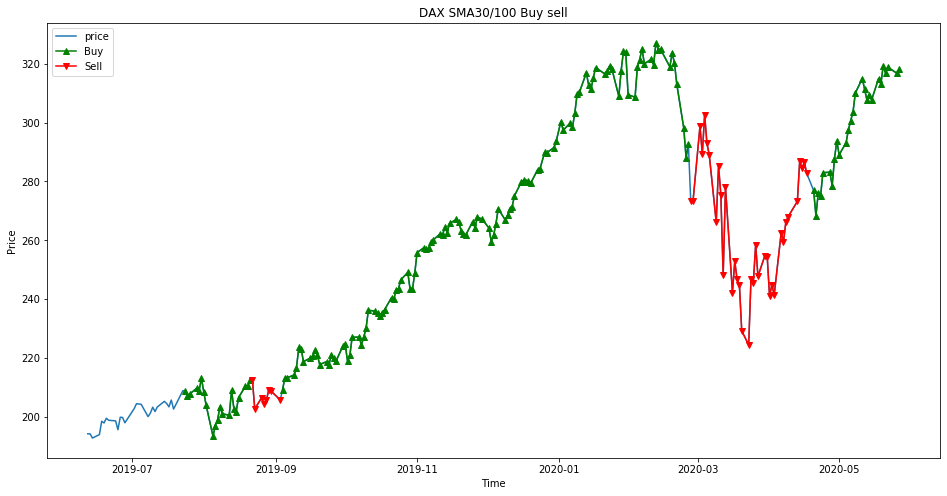

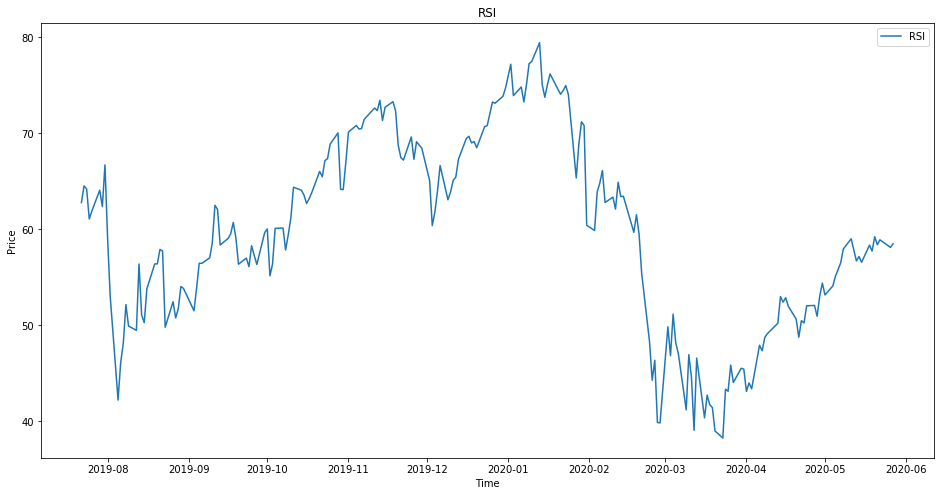

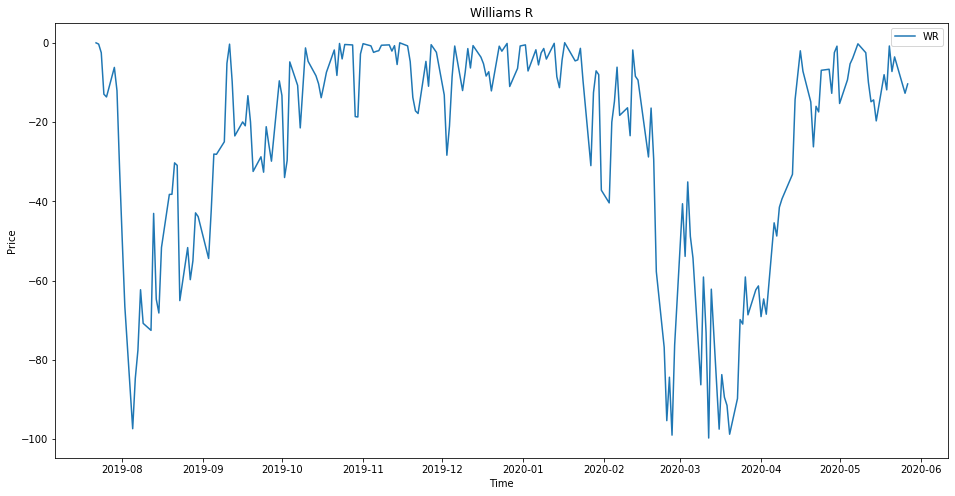

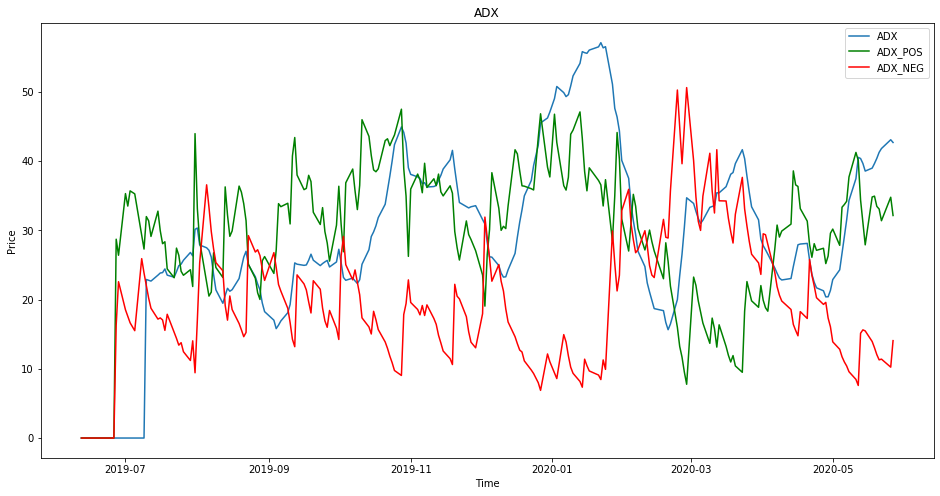

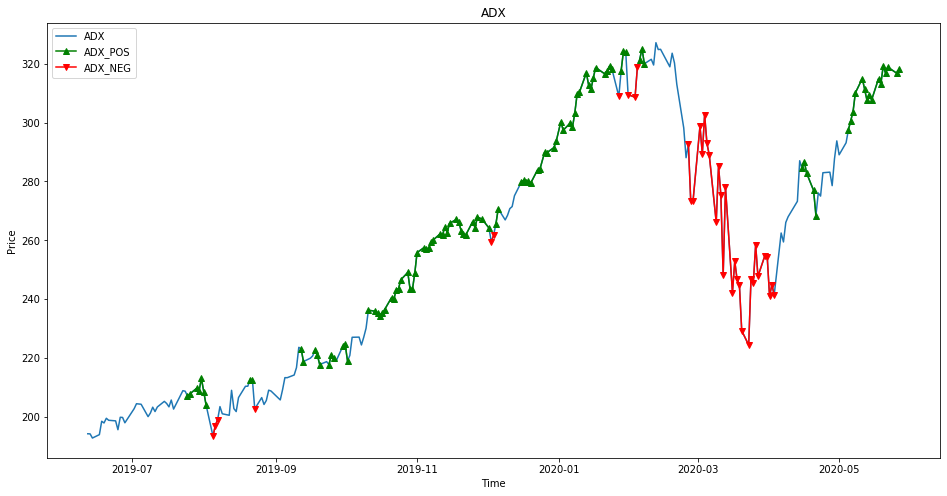

In [214]:
test = decide("AAPL")

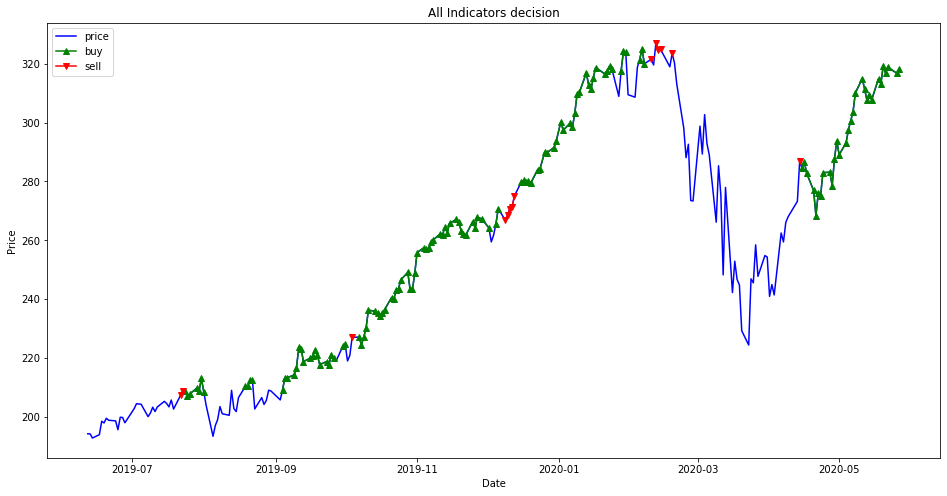

In [215]:
plot_decision(test)

In [10]:
#better sell no adx, sma_above

In [190]:
#better adx

In [218]:
#Next Step:
#    cfd broker finden, eventuell bux, aber vll auch was anderes

SyntaxError: invalid syntax (<ipython-input-218-1a9d1c07cc69>, line 1)